# Comparación de modelos MLP y CNN sobre el dataset MNIST
En este notebook se entrena y compara un modelo MLP y un modelo CNN utilizando exactamente el mismo dataset MNIST. El objetivo es observar cómo cambia el rendimiento al modificar la arquitectura de la red neuronal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocesamiento para MLP
x_train_mlp = x_train.reshape(-1, 784).astype('float32') / 255
x_test_mlp = x_test.reshape(-1, 784).astype('float32') / 255
# Preprocesamiento para CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encoding
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Modelo MLP
model_mlp = Sequential()
model_mlp.add(Dense(256, activation='relu'))
model_mlp.add(Dropout(0.3))
model_mlp.add(Dense(256, activation='relu'))
model_mlp.add(Dropout(0.3))
model_mlp.add(Dense(num_classes, activation='softmax'))

model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_mlp = model_mlp.fit(x_train_mlp, y_train_cat, validation_data=(x_test_mlp, y_test_cat), epochs=10, batch_size=128, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8134 - loss: 0.6076 - val_accuracy: 0.9601 - val_loss: 0.1282
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9510 - loss: 0.1608 - val_accuracy: 0.9710 - val_loss: 0.0976
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9627 - loss: 0.1180 - val_accuracy: 0.9737 - val_loss: 0.0836
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9705 - loss: 0.0911 - val_accuracy: 0.9759 - val_loss: 0.0776
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9764 - loss: 0.0767 - val_accuracy: 0.9794 - val_loss: 0.0623
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9791 - loss: 0.0665 - val_accuracy: 0.9782 - val_loss: 0.0710
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9812 - loss: 0.0590 - val_accuracy: 0.9813 - val_loss: 0.0649
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9816 - loss: 0.0564 - val_accuracy: 0.

In [3]:
# Modelo CNN
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(num_classes, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_cnn.fit(x_train_cnn, y_train_cat, validation_data=(x_test_cnn, y_test_cat), epochs=10, batch_size=128, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.8345 - loss: 0.5472 - val_accuracy: 0.9809 - val_loss: 0.0557
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9776 - loss: 0.0745 - val_accuracy: 0.9879 - val_loss: 0.0375
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.9884 - val_loss: 0.0352
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9875 - loss: 0.0401 - val_accuracy: 0.9911 - val_loss: 0.0244
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9903 - loss: 0.0324 - val_accuracy: 0.9915 - val_loss: 0.0257
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9910 - loss: 0.0288 - val_accuracy: 0.9909 - val_loss: 0.0266
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.9914 - val_loss: 0.0267
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9936 - loss: 0.0191 - 

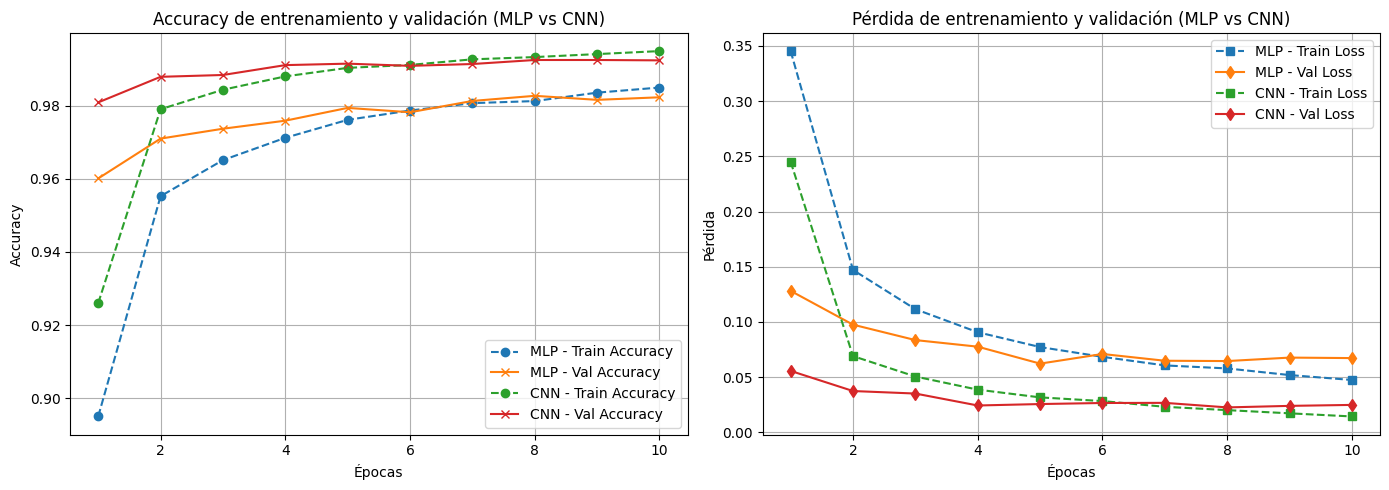

In [8]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_mlp.history['accuracy']) + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), tight_layout=True)

ax1.plot(epochs, history_mlp.history['accuracy'], label='MLP - Train Accuracy', linestyle='--', marker='o')
ax1.plot(epochs, history_mlp.history['val_accuracy'], label='MLP - Val Accuracy', marker='x')
ax1.plot(epochs, history_cnn.history['accuracy'], label='CNN - Train Accuracy', linestyle='--', marker='o')
ax1.plot(epochs, history_cnn.history['val_accuracy'], label='CNN - Val Accuracy', marker='x')
ax1.set_title('Accuracy de entrenamiento y validación (MLP vs CNN)')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# 2) Evolución del


ax2.plot(epochs, history_mlp.history['loss'], label='MLP - Train Loss', linestyle='--', marker='s')
ax2.plot(epochs, history_mlp.history['val_loss'], label='MLP - Val Loss', marker='d')
ax2.plot(epochs, history_cnn.history['loss'], label='CNN - Train Loss', linestyle='--', marker='s')
ax2.plot(epochs, history_cnn.history['val_loss'], label='CNN - Val Loss', marker='d')
ax2.set_title('Pérdida de entrenamiento y validación (MLP vs CNN)')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Pérdida')
ax2.legend()
ax2.grid(True)

plt.show()
